**Data Visualisation using Seaborn**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
iris = pd.read_csv('Iris.csv')

In [4]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


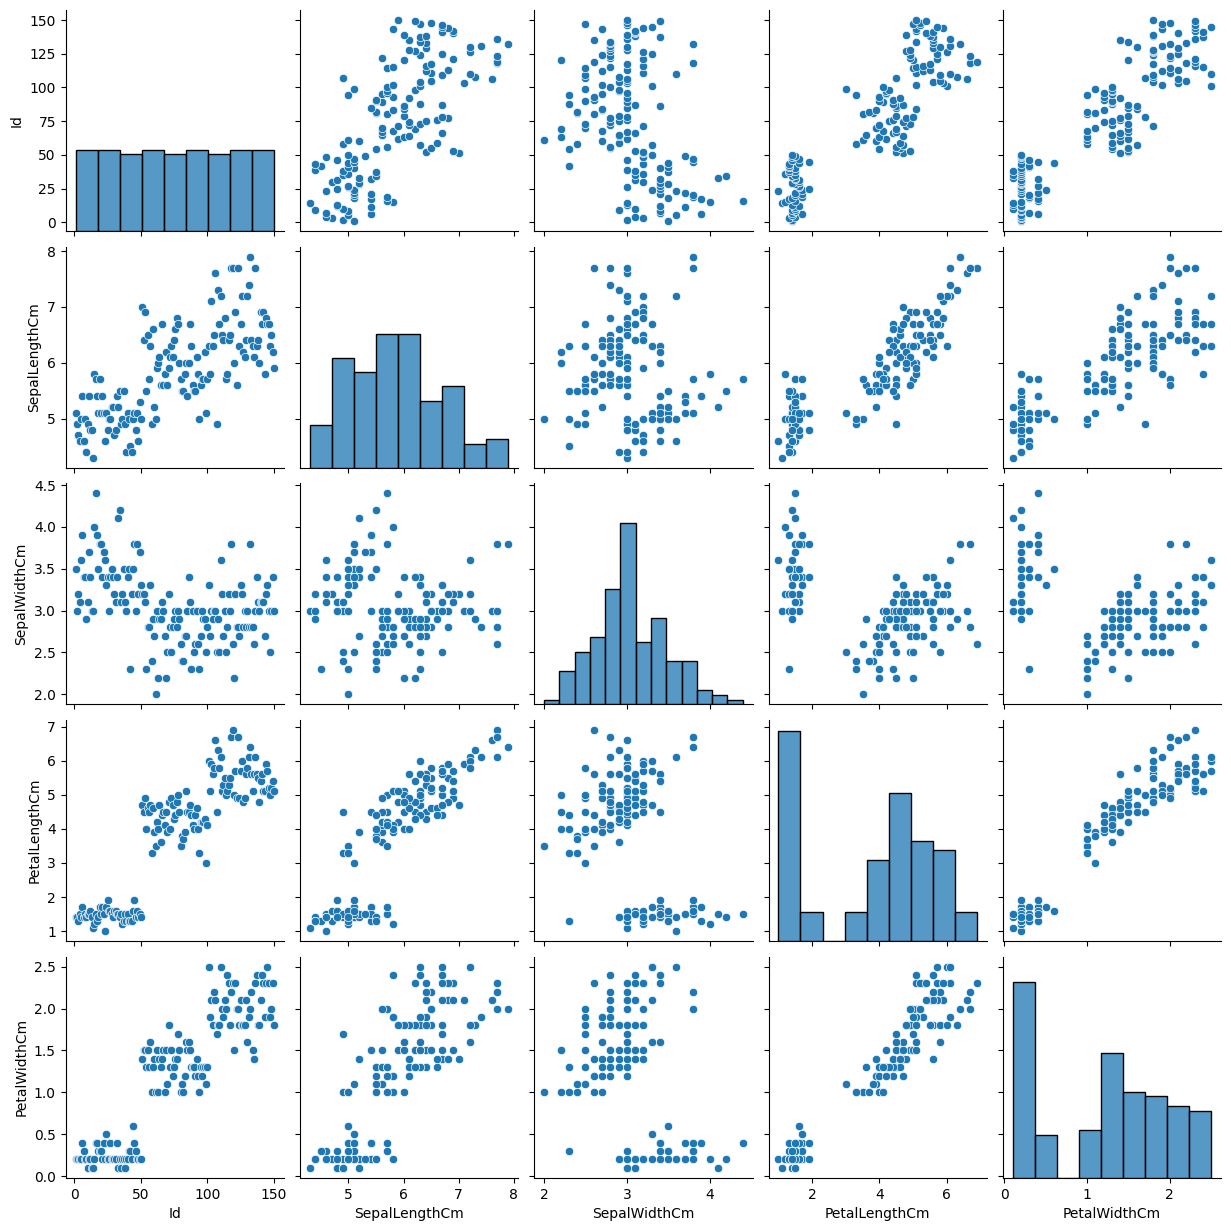

In [6]:
# Affiche une matrice de graphiques :
# - histogrammes sur la diagonale
# - scatter plots pour comparer chaque paire de variables
sns.pairplot(iris)

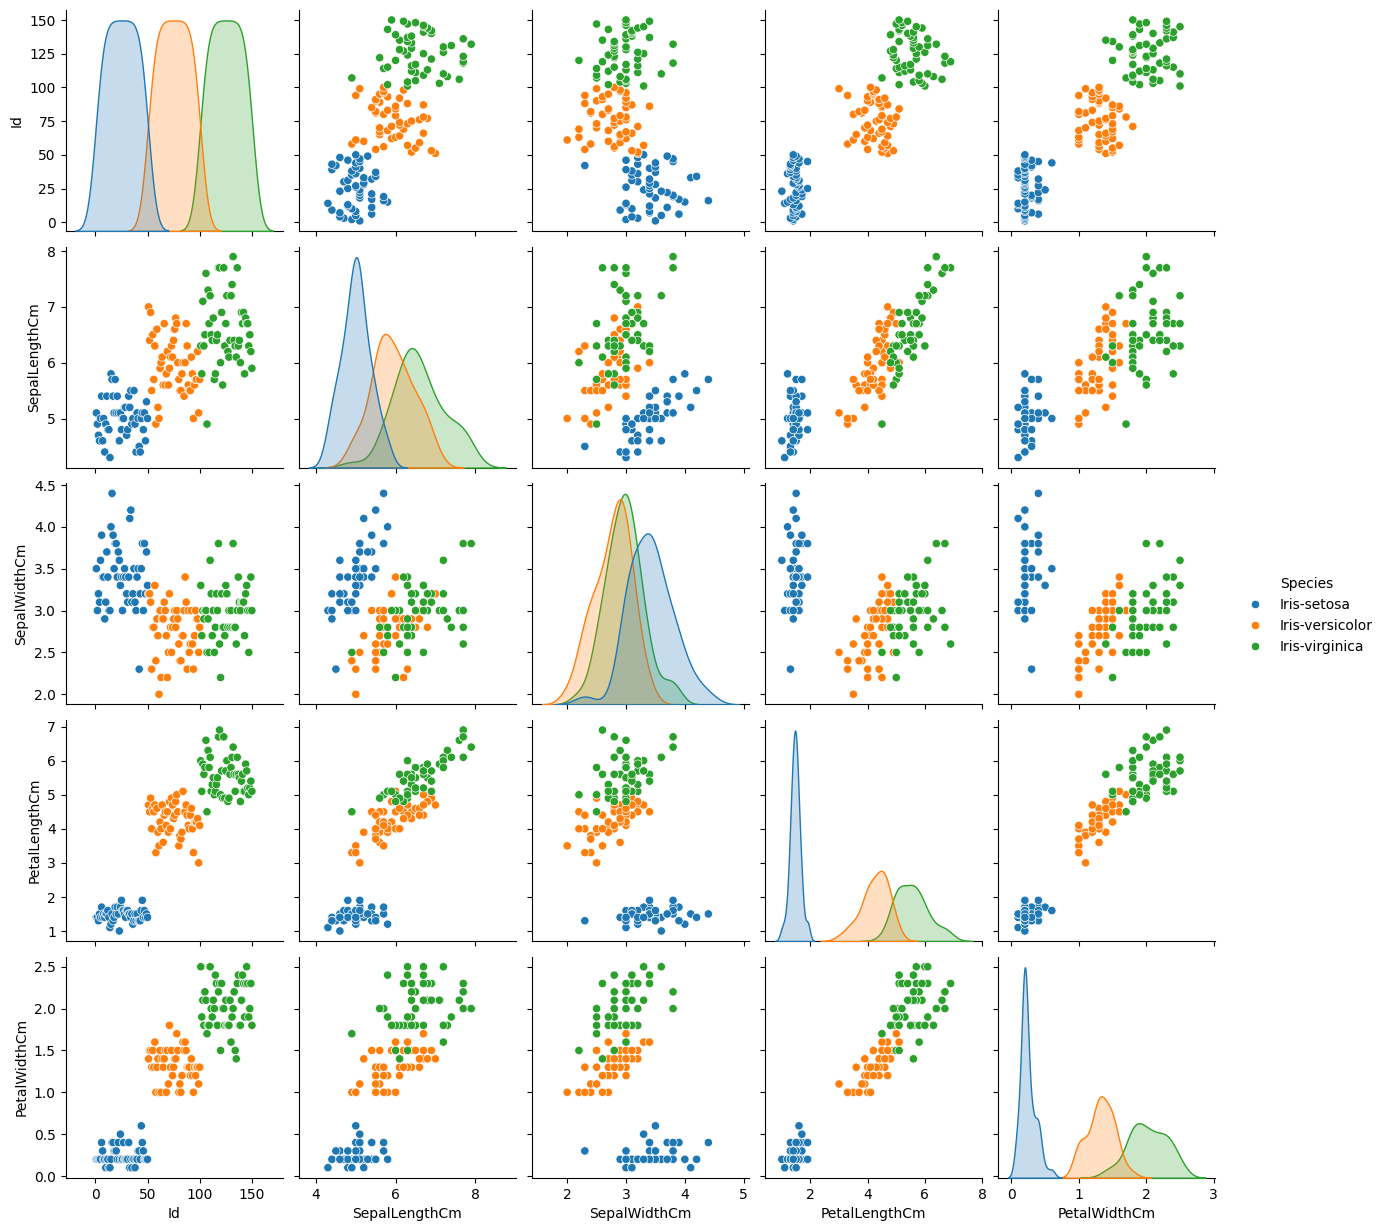

In [11]:
# Crée une matrice de graphiques de dispersion (pairplot)
# Chaque point représente une fleur
# Les couleurs (hue='Species') distinguent les 3 espèces d'iris
sns.pairplot(iris, hue='Species')

In [40]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [41]:
# Affiche les noms des colonnes du DataFrame 'titanic'
print(titanic.columns)

# Supprime certaines colonnes jugées inutiles pour l'analyse
# 'alone', 'alive', 'who', 'adult_male', 'embark_town', 'class'
# axis=1 indique qu'on supprime des colonnes (et non des lignes)
# inplace=True modifie directement le DataFrame existant
titanic.drop(['alone', 'alive', 'who', 'adult_male', 'embark_town', 'class'], axis=1, inplace=True)

# Supprime toutes les lignes qui contiennent au moins une valeur manquante (NaN)
# axis=0 signifie suppression des lignes
# inplace=True modifie directement le DataFrame
titanic.dropna(axis=0, inplace=True)

# Affiche les 5 premières lignes du DataFrame nettoyé
titanic.head()


Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')


,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
1,1,1,female,38.0,1,0,71.2833,C,C
3,1,1,female,35.0,1,0,53.1000,S,C
6,0,1,male,54.0,0,0,51.8625,S,E
10,1,3,female,4.0,1,1,16.7000,S,G
11,1,1,female,58.0,0,0,26.5500,S,C


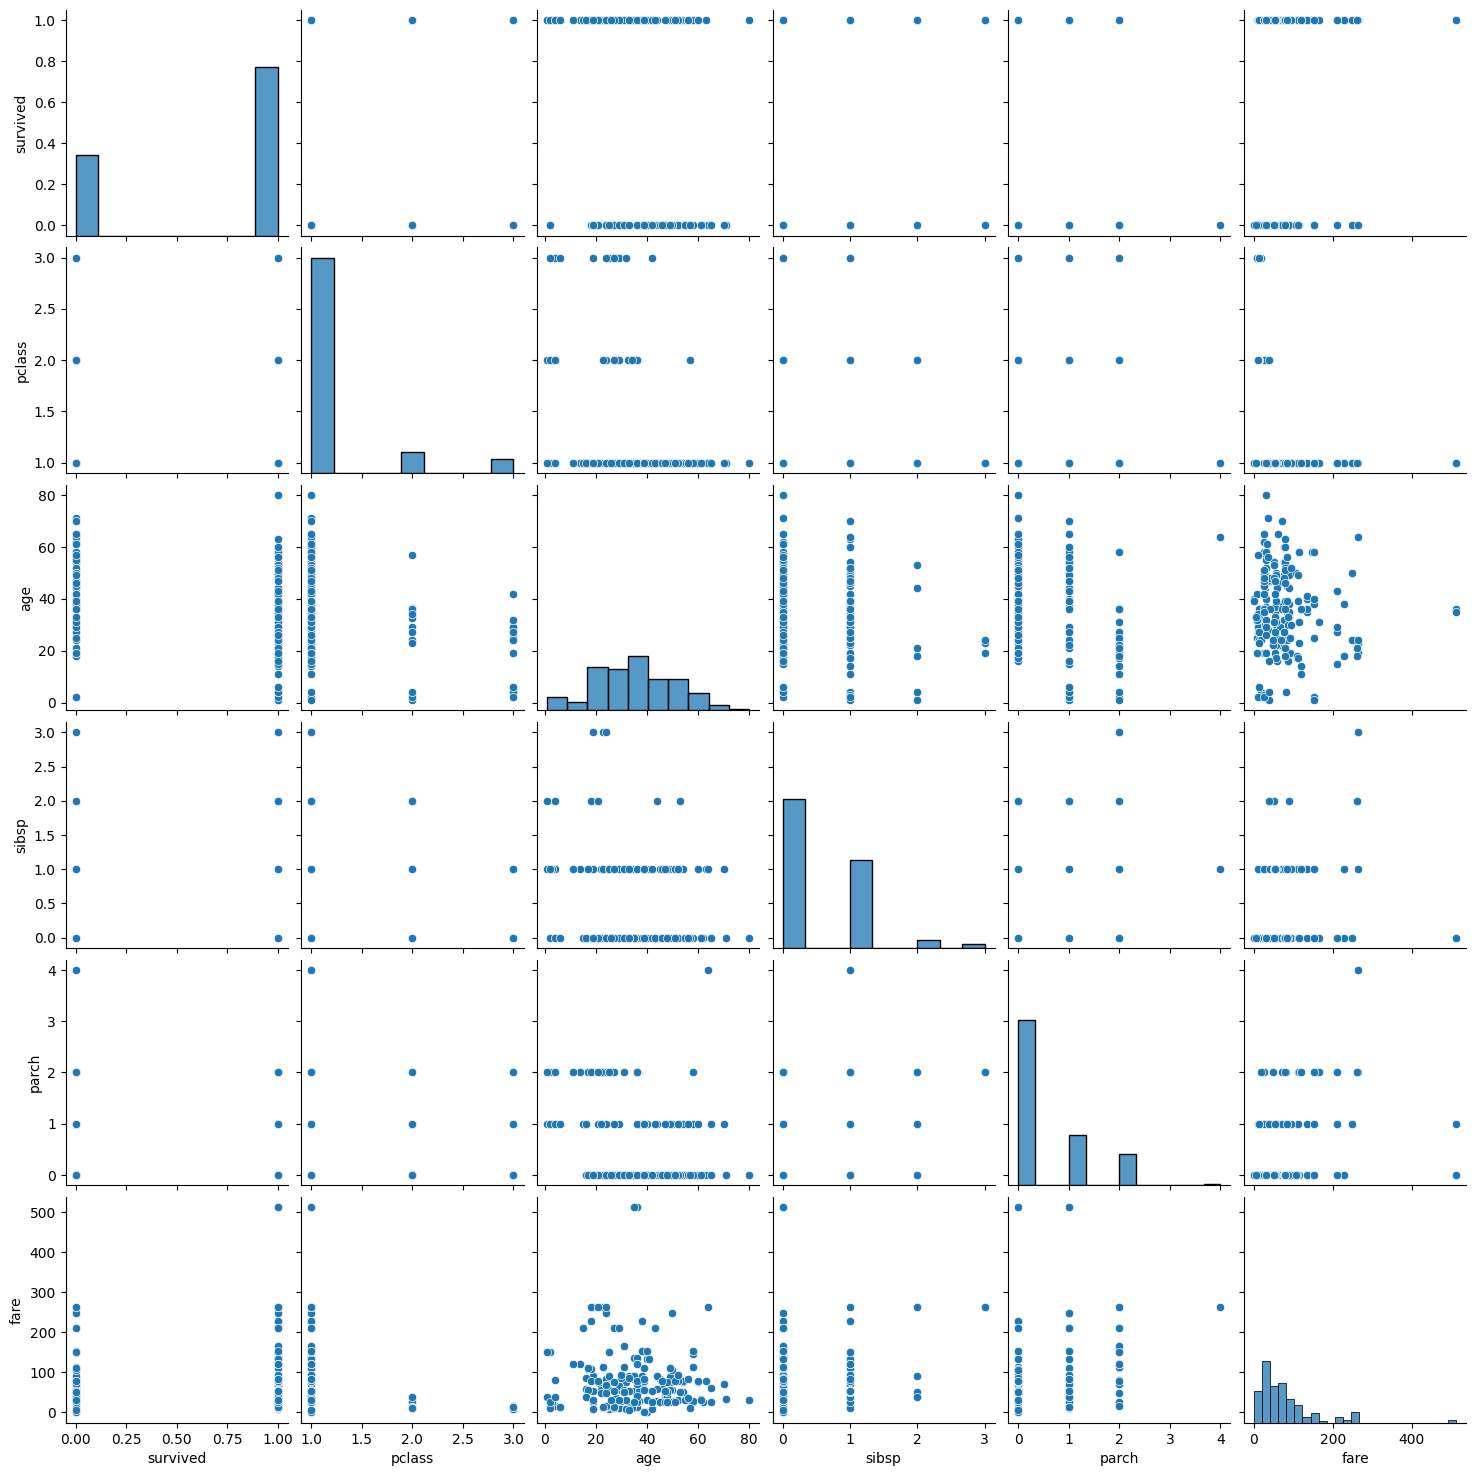

In [42]:
# Crée une matrice de graphiques pour visualiser les relations entre toutes les variables numériques du DataFrame 'titanic'
# Sur la diagonale : histogrammes de chaque variable
# Hors diagonale : scatter plots montrant la relation entre chaque paire de variables
sns.pairplot(titanic)

**Categorical plots**

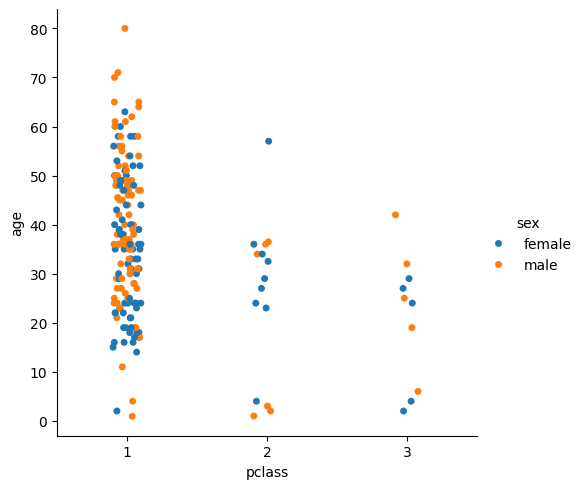

In [43]:
# Crée un graphique catégoriel pour visualiser la relation entre la classe des passagers ('pclass') et leur âge ('age')
# 'x' correspond à l'axe des catégories : ici, les classes de passagers
# 'y' correspond à l'axe numérique : ici, l'âge
# 'hue' permet de différencier les données par couleur selon le sexe ('sex')
# 'data' indique le DataFrame utilisé : ici 'titanic'
sns.catplot(x='pclass', y='age', data=titanic, hue='sex')

<Axes: xlabel='pclass', ylabel='age'>

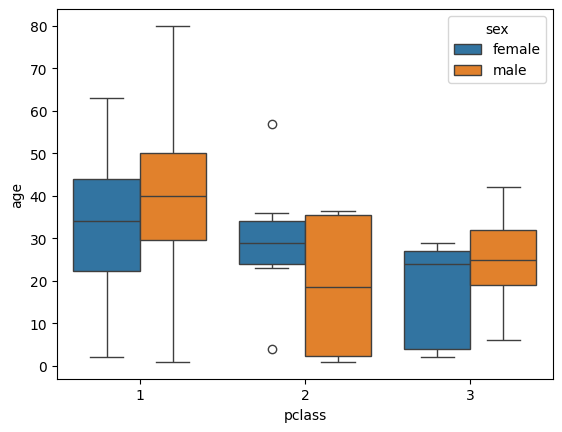

In [44]:
# Crée un boxplot pour visualiser la répartition de l'âge ('age') selon la classe des passagers ('pclass')
# 'x' correspond aux catégories : ici les classes de passagers
# 'y' correspond à la variable numérique : ici l'âge
# 'hue' permet de séparer les données par couleur selon le sexe ('sex')
# Chaque boîte montre la médiane, les quartiles et les éventuels outliers
sns.boxplot(x='pclass', y='age', data=titanic, hue='sex')


**Distribution plots**

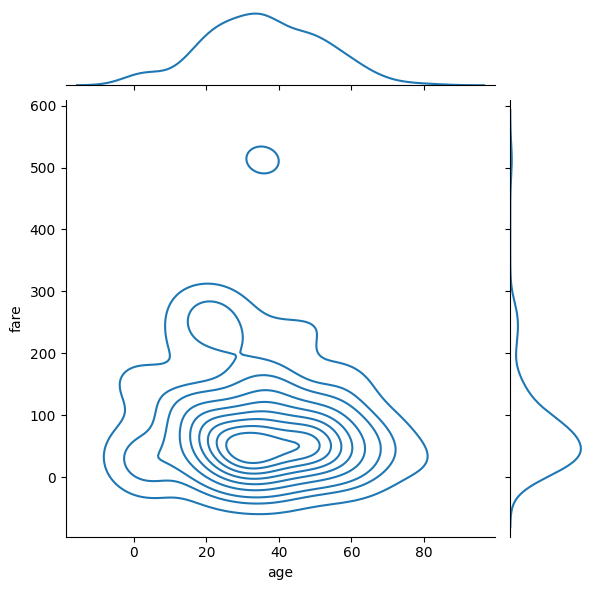

In [45]:
# Crée un graphique combiné pour visualiser la relation entre l'âge ('age') et le prix du billet ('fare')
# 'x' : variable sur l'axe horizontal (âge)
# 'y' : variable sur l'axe vertical (prix du billet)
# 'data' : DataFrame utilisé (ici 'titanic')
# 'kind="kde"' : trace des estimations de densité bidimensionnelle (Kernel Density Estimation)
# Sur les axes : densité marginale de chaque variable
sns.jointplot(x='age', y='fare', data=titanic, kind='kde')

<Axes: >

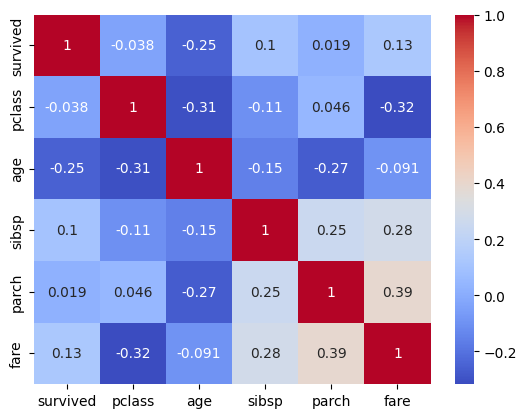

In [46]:
# Sélectionner uniquement les colonnes numériques
numeric_cols = titanic.select_dtypes(include='number')

# Créer la heatmap
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')